# Geely_Auto_Car_Price_Prediction_Assignment

`Problem Statement:` A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

 - Which variables are significant in predicting the price of a car

 - How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and all other important libraries and read the car dataset

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime as dt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
car = pd.read_csv('CarPrice_Assignment.csv')

car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Inspecting the shape of the dataframe
car.shape

(205, 26)

## Step 2: Data Cleaning

### Handling Data irregularities in the `CarName` column

In [4]:
# Some values in CarName column have '-'. Replacing it with whitespace ' '.
car['CarName'] = car['CarName'].str.replace('-', ' ', regex=False)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Extracting the car company value from carname column by splitting on ' ' and taking the first object
# Creating the new column CarCompany after the column CarName
loc_index = car.columns.get_loc('CarName')+1
car.insert(loc=loc_index, column='CarCompany', value = car['CarName'].str.split(' ').str[0])

In [6]:
#Dropping the original carname field
car.drop('CarName',1, inplace=True)

In [7]:
car.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
car.dtypes

car_ID                int64
symboling             int64
CarCompany           object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(car.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(car.isnull().sum()/car.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
price,0,0.0
highwaympg,0,0.0
symboling,0,0.0
CarCompany,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0


In [10]:
#Replacing some of the values with incorrect spellings with the correct ones

car['CarCompany'] = car['CarCompany'].str.replace('maxda', 'mazda', regex=False)
car['CarCompany'] = car['CarCompany'].str.replace('porcshce', 'porsche', regex=False)
car['CarCompany'] = car['CarCompany'].str.replace('toyouta', 'toyota', regex=False)
car['CarCompany'] = car['CarCompany'].str.replace('vokswagen', 'volkswagen', regex=False)
car['CarCompany'] = car['CarCompany'].str.replace('vw', 'volkswagen', regex=False)
car['CarCompany'] = car['CarCompany'].str.replace('Nissan', 'nissan', regex=False)
car.CarCompany.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

## Step 3: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

### Visualization of Numerical Data - Looking at Correlations

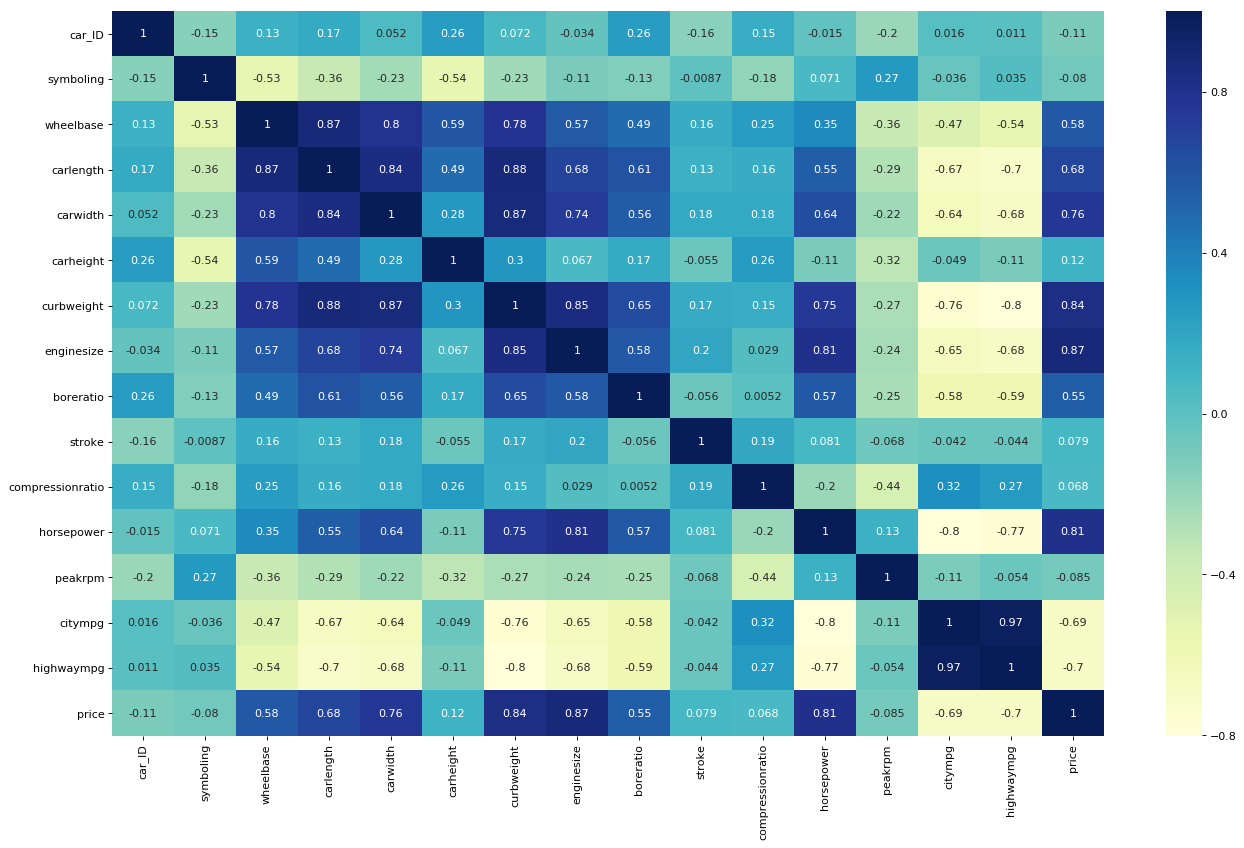

In [11]:
plt.figure(figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = car.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)

plt.show()

From the above heat map we see that some of the variables have a strong correlation with each other:

 - wheelbase
 - carlength
 - carwidth
 - curbweight
 - enginesize
 - horsepower

However, there are also a few variables showing a negative relationship with price variable like,
 - citympg,
 - highwaympg. 

We will have to handle this issue at a later stage

### Visualization of Categorical Data

#### Mapping features like Fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, cylindernumber, enginetype,  fuelsystem against Price

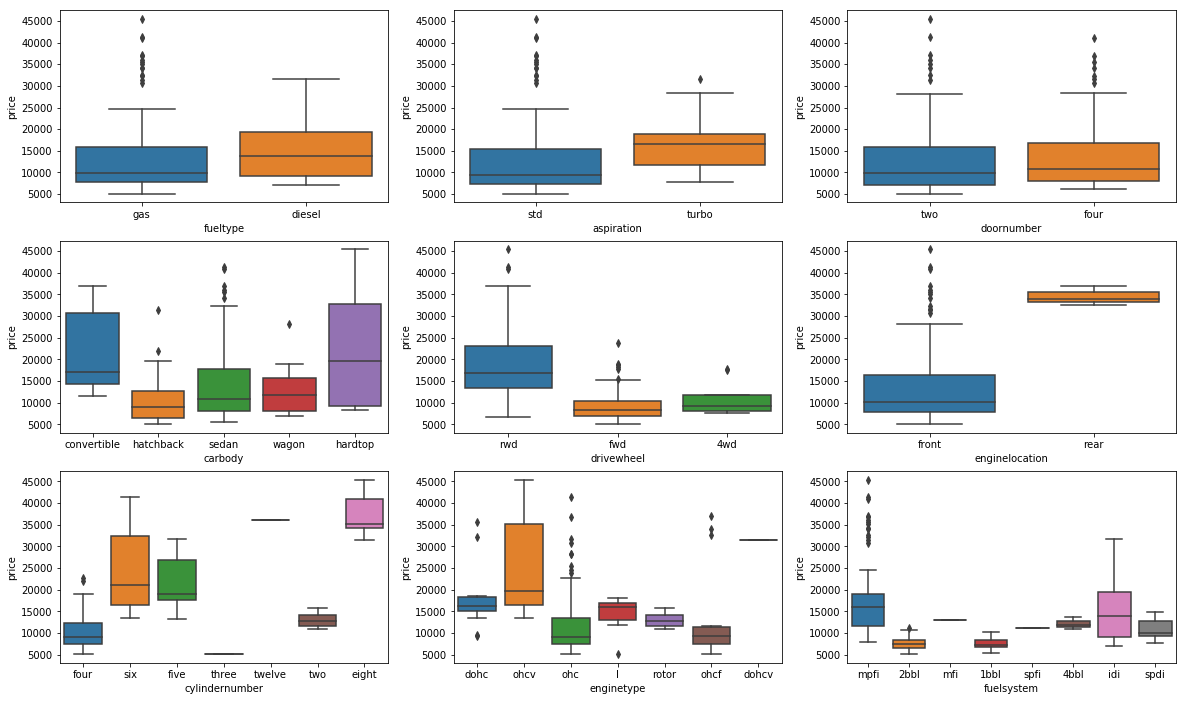

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(3,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)

plt.show()

#### Observations: 

 - fuel type seems have an effect on the pricing of the cars. 
 - enginelocation and aspiration has an affect on the pricing of the car
 - The price of real wheel drive is significantly higher that other drivewheel options.
 - cylindernumber and engine type also seem to regulate the price of cars.

##### We will confirm all of this later.

#### Mapping CarCompany against Price

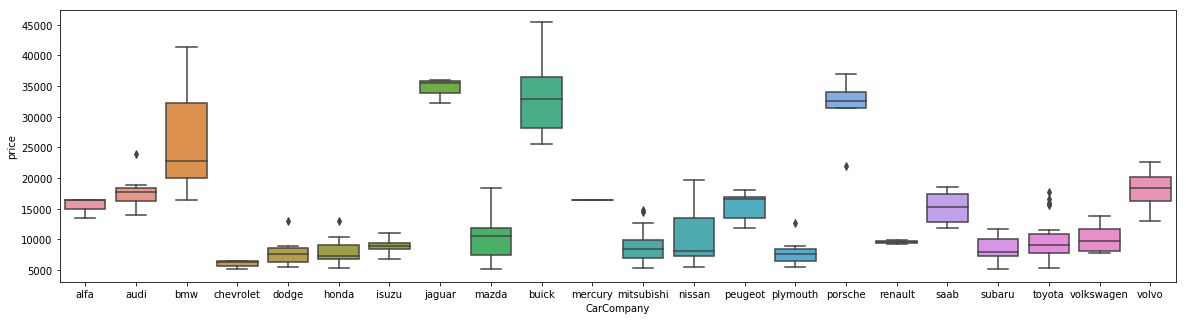

In [13]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'CarCompany', y = 'price', data = car)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `carbody` with `fueltype` as the hue.

#### Mapping CarBody and  Fueltype against Price

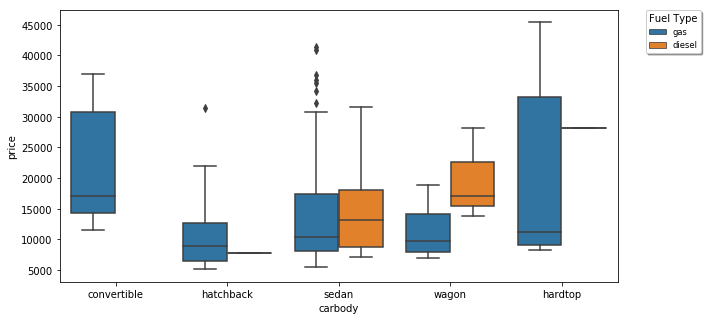

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = car)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Fuel Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Step 4: Data Preparation

#### Symboling is a categorical variable which has negative values. 

#### A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

#### Let check the frequency of these values

In [15]:
car.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

#### Let's make the category clear by classifying based on risk

    -ve symboling as safe

    0, 1 as moderately safe

    2,3 as risky

In [16]:
car['symboling'] = car['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderately safe',1: 'moderately safe',2: 'risky',3:'risky'})
car.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,risky,alfa,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,risky,alfa,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,moderately safe,alfa,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,risky,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,risky,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


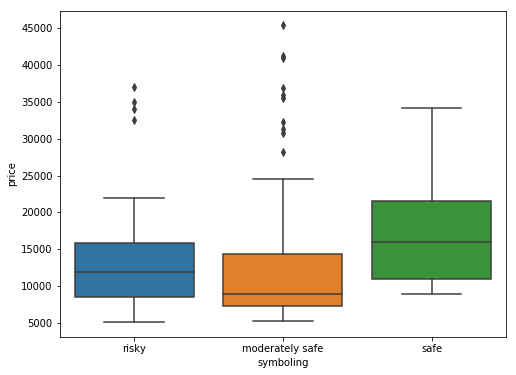

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.show()

#### Derive Metrics

Earlier I saw that there some features which are strongly correlated to each other.

We can nullify this by creating new ratio variables consisting of these correlated features

In [18]:
# Creating new variable: Ration of Length to Width
car['Len/Wdth'] = car.carlength/car.carwidth

# Creating new variable: Ration of Width to Height
car['Wdth/Ht'] = car.carwidth/car.carheight

# Creating new variable: Ration of Power to Weight
car['Power/CrbWt'] = car.horsepower/car.curbweight

# Creating new variable: Ration of Highway and city mileages
car['Hmpg/Cmpg'] = car.highwaympg/car.citympg

## droping the orignal variables
car.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Len/Wdth,Wdth/Ht,Power/CrbWt,Hmpg/Cmpg
0,1,risky,alfa,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714
1,2,risky,alfa,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714
2,3,moderately safe,alfa,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421
3,4,risky,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000
4,5,risky,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222


#### Mapping CarCompany against Price

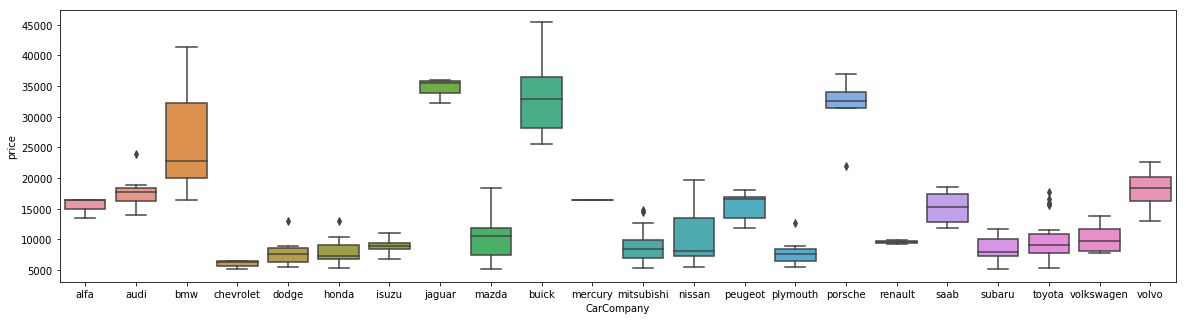

In [19]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'CarCompany', y = 'price', data = car)
plt.show()

From the above plot we see that the company brand value affects the price of the car. And there are 22 different values of Car company in the dataset.

If we create dummy variables for the column CarCompany, we will land up with at least 21 new columns. This can pull down performance level of the model.

Now from the plot we see that the price is high for premium car brands like bmw, buick, jaguar and porsche and it decreases with decrease in the opulence of the brand.

Thus let us segment the car companies based on the mean car price as


In [20]:
# Checking the mean carprice for each car company
pd.DataFrame(round(car.groupby('CarCompany').price.mean().sort_values(ascending=False),2).reset_index())

,CarCompany,price
0,jaguar,34600.00
1,buick,33647.00
2,porsche,31400.50
3,bmw,26118.75
4,volvo,18063.18
5,audi,17859.17
6,mercury,16503.00
7,alfa,15498.33
8,peugeot,15489.09
9,saab,15223.33


#### Based on the mean prices we assign each of the car companies into 3 tiers based on the below logic

 - lowtier if company mean price is below 10,000
 - midtier if company mean price is above 10,000 and below 20,000
 - hightier if company mean price is above 20,000

In [21]:
company_segment_dict = {
    'chevrolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
car['company_segment'] = car['CarCompany'].map(company_segment_dict)
# Dropping the orignal car_company variable
car.drop('CarCompany',axis=1,inplace=True)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,stroke,compressionratio,horsepower,peakrpm,price,Len/Wdth,Wdth/Ht,Power/CrbWt,Hmpg/Cmpg,company_segment
0,1,risky,gas,std,two,convertible,rwd,front,88.6,2548,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,2,risky,gas,std,two,convertible,rwd,front,88.6,2548,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,3,moderately safe,gas,std,two,hatchback,rwd,front,94.5,2823,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,4,risky,gas,std,four,sedan,fwd,front,99.8,2337,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,5,risky,gas,std,four,sedan,4wd,front,99.4,2824,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


#### Mapping Car Tiers against Price

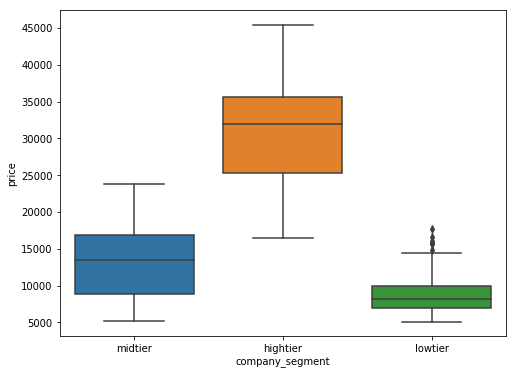

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'company_segment', y = 'price', data = car)
plt.show()

##### From the above plot, our theory of classification is proved about the dependency of car price on different tiers of car companies

In [23]:
pd.DataFrame(round(car.groupby('company_segment').price.mean(),2))

,price
company_segment,
hightier,30788.69
lowtier,8893.25
midtier,13231.84


In [24]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(car.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(car.isnull().sum()/car.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
company_segment,0,0.0
cylindernumber,0,0.0
symboling,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0
wheelbase,0,0.0


In [25]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,stroke,compressionratio,horsepower,peakrpm,price,Len/Wdth,Wdth/Ht,Power/CrbWt,Hmpg/Cmpg,company_segment
0,1,risky,gas,std,two,convertible,rwd,front,88.6,2548,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,2,risky,gas,std,two,convertible,rwd,front,88.6,2548,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,3,moderately safe,gas,std,two,hatchback,rwd,front,94.5,2823,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,4,risky,gas,std,four,sedan,fwd,front,99.8,2337,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,5,risky,gas,std,four,sedan,4wd,front,99.4,2824,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [26]:
car.shape

(205, 25)

### Outlier Treatment

In [27]:
numeric_variables = list(car.columns[car.dtypes != 'object'])
print(numeric_variables)

['car_ID', 'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price', 'Len/Wdth', 'Wdth/Ht', 'Power/CrbWt', 'Hmpg/Cmpg']


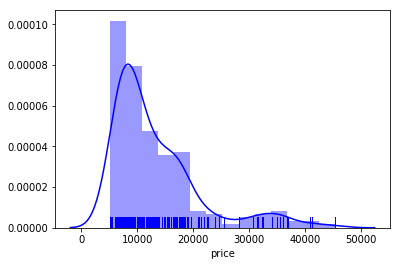

In [28]:
# Plotting the frequency distribution of 'price' variable
plt.figure(figsize=(6,4))
sns.distplot(car['price'], color='blue', rug=True)
plt.show()

##### We see that the 'price' variable has a right skewed distribution, this is clearly due to outliers in the variable.

In [29]:
# Checking for outliers in the continuous variables
car_price = car[['price']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
car_price.describe(percentiles=[.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
price,205.0,13276.710571,7988.852332,5118.0,7788.0,10295.0,16503.0,22563.0,32472.4,40802.72,45400.0


#### We decide to drop all observations with price within 3 standard deviations from the mean value 

In [30]:
car= car[np.abs(car.price-car.price.mean()) <= (3*car.price.std())]
car.shape

(202, 25)

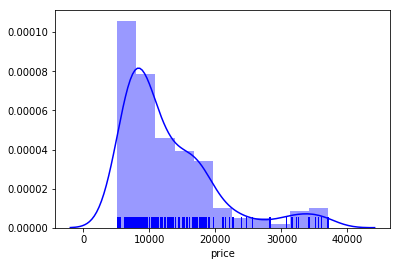

In [31]:
# Plotting the frequency distribution of 'price' variable
plt.figure(figsize=(6,4))
sns.distplot(car['price'], color='blue', rug=True)
plt.show()

### In order to fit a regression line, we would need numerical values and not string.

 - Binary Mapping of variables with 2 levels to the values 0 and 1
 - Dummy Variables creation for variables with more than 2 levels

### Binary Mapping

In [32]:
# Converting Yes to 1 and No to 0
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,stroke,compressionratio,horsepower,peakrpm,price,Len/Wdth,Wdth/Ht,Power/CrbWt,Hmpg/Cmpg,company_segment
0,1,risky,1,1,1,convertible,rwd,1,88.6,2548,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,2,risky,1,1,1,convertible,rwd,1,88.6,2548,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,3,moderately safe,1,1,1,hatchback,rwd,1,94.5,2823,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,4,risky,1,1,0,sedan,fwd,1,99.8,2337,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,5,risky,1,1,0,sedan,4wd,1,99.4,2824,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


### Dummy Variables

The variable `CarCompany` has several levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [33]:
# Creating dummy variables
car = pd.get_dummies(car, drop_first = True)
car.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
0,1,1,1,1,1,88.6,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,1
1,2,1,1,1,1,88.6,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,1
2,3,1,1,1,1,94.5,2823,152,2.68,3.47,...,0,0,0,0,0,1,0,0,0,1
3,4,1,1,0,1,99.8,2337,109,3.19,3.40,...,0,0,0,0,0,1,0,0,0,1
4,5,1,1,0,1,99.4,2824,136,3.19,3.40,...,0,0,0,0,0,1,0,0,0,1


In [34]:
# Dropping the car_id column
car = car.drop('car_ID', axis=1)
car.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
0,1,1,1,1,88.6,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
car.shape

(202, 46)

## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 6: Rescaling the Features 

We will use MinMax scaling.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
# Applying the scaling on continuous numerical variables
variables_to_be_scaled = ['wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price','Len/Wdth','Wdth/Ht','Power/CrbWt','Hmpg/Cmpg']

df_train[variables_to_be_scaled] = scaler.fit_transform(df_train[variables_to_be_scaled])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
1,1,1,1,1,0.068966,0.411171,0.260377,0.664286,0.290476,0.12500,...,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.301396,0.139623,0.500000,0.480952,0.15000,...,0,0,0,0,0,1,0,0,1,0
197,1,1,0,1,0.610345,0.602793,0.301887,0.885714,0.514286,0.15625,...,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.412335,0.320755,0.771429,0.680952,0.14375,...,0,0,0,0,0,1,0,0,1,0
190,1,1,1,1,0.272414,0.284329,0.181132,0.464286,0.633333,0.09375,...,0,0,0,0,0,1,0,0,0,1


In [40]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
fueltype,141.0,0.886525,0.318304,0.0,1.000000,1.000000,1.000000,1.0
aspiration,141.0,0.794326,0.405634,0.0,1.000000,1.000000,1.000000,1.0
doornumber,141.0,0.439716,0.498122,0.0,0.000000,0.000000,1.000000,1.0
enginelocation,141.0,0.985816,0.118672,0.0,1.000000,1.000000,1.000000,1.0
wheelbase,141.0,0.413402,0.198892,0.0,0.272414,0.358621,0.503448,1.0
curbweight,141.0,0.411779,0.198452,0.0,0.254849,0.359193,0.552366,1.0
enginesize,141.0,0.240894,0.146364,0.0,0.135849,0.188679,0.301887,1.0
boreratio,141.0,0.559980,0.192528,0.0,0.421429,0.550000,0.742857,1.0
stroke,141.0,0.551570,0.150278,0.0,0.490476,0.571429,0.633333,1.0
compressionratio,141.0,0.210381,0.263427,0.0,0.100000,0.125000,0.150000,1.0


## Step 7: Dividing into X and Y sets for the model building

In [41]:
y_train = df_train.pop('price')
X_train = df_train

## Step 8: Building our model

This time, we will be using the **Linear Regression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 15
lr_0 = LinearRegression()
lr_0.fit(X_train, y_train)

rfe = RFE(lr_0, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 6),
 ('aspiration', False, 9),
 ('doornumber', False, 24),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 14),
 ('enginesize', False, 8),
 ('boreratio', False, 4),
 ('stroke', False, 5),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 3),
 ('Len/Wdth', True, 1),
 ('Wdth/Ht', True, 1),
 ('Power/CrbWt', True, 1),
 ('Hmpg/Cmpg', False, 23),
 ('symboling_risky', False, 26),
 ('symboling_safe', False, 29),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 2),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 30),
 ('drivewheel_rwd', False, 25),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 28),
 ('enginetype_ohcf', False, 27),
 ('enginetype_ohcv', False, 7),
 ('enginetype_rotor', False, 17),
 ('cylindernumber_five', False, 12),
 ('cylindernumber_four', False, 10),
 ('cylindernumber_six', False, 11),
 ('cylindernumber_three

In [45]:
# Selecting 15 features selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'compressionratio', 'horsepower',
       'Len/Wdth', 'Wdth/Ht', 'Power/CrbWt', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_wagon', 'enginetype_dohcv',
       'cylindernumber_twelve', 'fuelsystem_idi', 'company_segment_lowtier',
       'company_segment_midtier'],
      dtype='object')

In [46]:
# # Selecting features rejected by RFE 
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'Hmpg/Cmpg', 'symboling_risky',
       'symboling_safe', 'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [47]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
X_train_rfe.head()

,enginelocation,wheelbase,compressionratio,horsepower,Len/Wdth,Wdth/Ht,Power/CrbWt,carbody_hardtop,carbody_hatchback,carbody_wagon,enginetype_dohcv,cylindernumber_twelve,fuelsystem_idi,company_segment_lowtier,company_segment_midtier
1,1,0.068966,0.12500,0.262500,0.574393,0.592205,0.360040,0,0,0,0,0,0,0,1
165,1,0.272414,0.15000,0.266667,0.578350,0.350729,0.449708,0,0,0,0,0,0,1,0
197,1,0.610345,0.15625,0.275000,0.847483,0.230896,0.267268,0,0,1,0,0,0,0,1
169,1,0.406897,0.14375,0.283333,0.655931,0.462513,0.389125,0,1,0,0,0,0,1,0
190,1,0.272414,0.09375,0.175000,0.505674,0.421594,0.313697,0,1,0,0,0,0,0,1


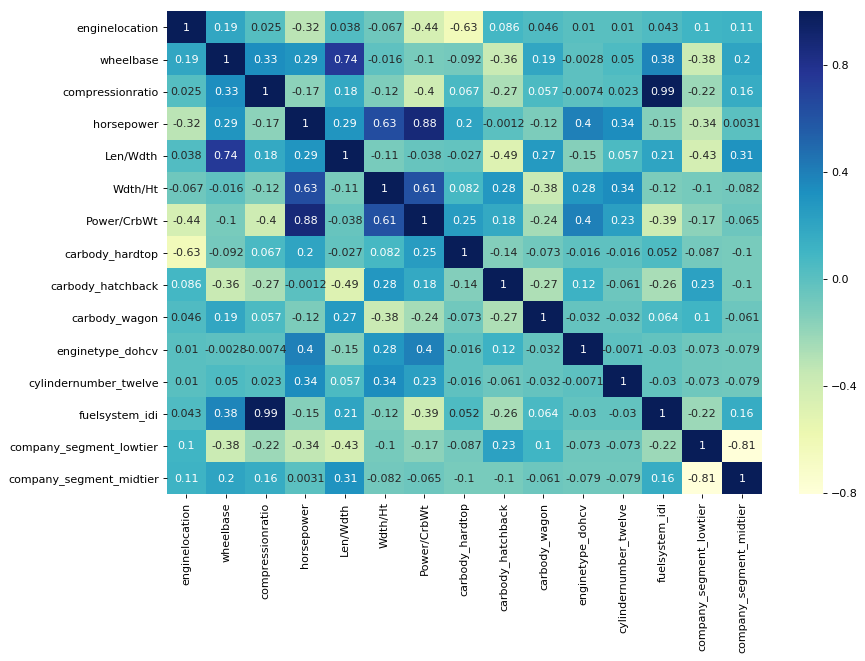

In [49]:
# Inspecting the correlation between RFE chosen features

plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_rfe.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)

plt.show()

### Building model using statsmodel, for the detailed statistics

In [50]:
# Adding a constant variable 
import statsmodels.api as sm 

X_train_new = X_train_rfe

X_train_lm = sm.add_constant(X_train_new)

In [51]:
lr_1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [52]:
#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.55e-74
Time:                        15:02:34   Log-Likelihood:                 221.69
No. Observations:                 141   AIC:                            -411.4
Df Residuals:                     125   BIC:                            -364.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,compressionratio,85.29
6,Power/CrbWt,69.11
3,horsepower,65.49
0,enginelocation,63.05
12,fuelsystem_idi,61.12
4,Len/Wdth,37.13
1,wheelbase,21.23
5,Wdth/Ht,17.43
13,company_segment_lowtier,10.47
14,company_segment_midtier,9.47


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [54]:
X_train_new = X_train_new.drop('carbody_hardtop', axis=1)
X_train_new.head()

,enginelocation,wheelbase,compressionratio,horsepower,Len/Wdth,Wdth/Ht,Power/CrbWt,carbody_hatchback,carbody_wagon,enginetype_dohcv,cylindernumber_twelve,fuelsystem_idi,company_segment_lowtier,company_segment_midtier
1,1,0.068966,0.12500,0.262500,0.574393,0.592205,0.360040,0,0,0,0,0,0,1
165,1,0.272414,0.15000,0.266667,0.578350,0.350729,0.449708,0,0,0,0,0,1,0
197,1,0.610345,0.15625,0.275000,0.847483,0.230896,0.267268,0,1,0,0,0,0,1
169,1,0.406897,0.14375,0.283333,0.655931,0.462513,0.389125,1,0,0,0,0,1,0
190,1,0.272414,0.09375,0.175000,0.505674,0.421594,0.313697,1,0,0,0,0,0,1


In [55]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const                      0.655116
enginelocation            -0.252308
wheelbase                  0.167095
compressionratio           0.269035
horsepower                 1.602462
Len/Wdth                  -0.192604
Wdth/Ht                    0.154644
Power/CrbWt               -1.022345
carbody_hatchback         -0.039298
carbody_wagon             -0.018828
enginetype_dohcv          -0.321803
cylindernumber_twelve     -0.320593
fuelsystem_idi            -0.252024
company_segment_lowtier   -0.297804
company_segment_midtier   -0.240472
dtype: float64

In [56]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     175.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.94e-75
Time:                        15:02:35   Log-Likelihood:                 221.09
No. Observations:                 141   AIC:                            -412.2
Df Residuals:                     126   BIC:                            -367.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,compressionratio,80.93
6,Power/CrbWt,64.91
3,horsepower,64.62
11,fuelsystem_idi,59.15
0,enginelocation,58.51
4,Len/Wdth,36.95
1,wheelbase,21.20
5,Wdth/Ht,17.29
12,company_segment_lowtier,10.43
13,company_segment_midtier,9.33


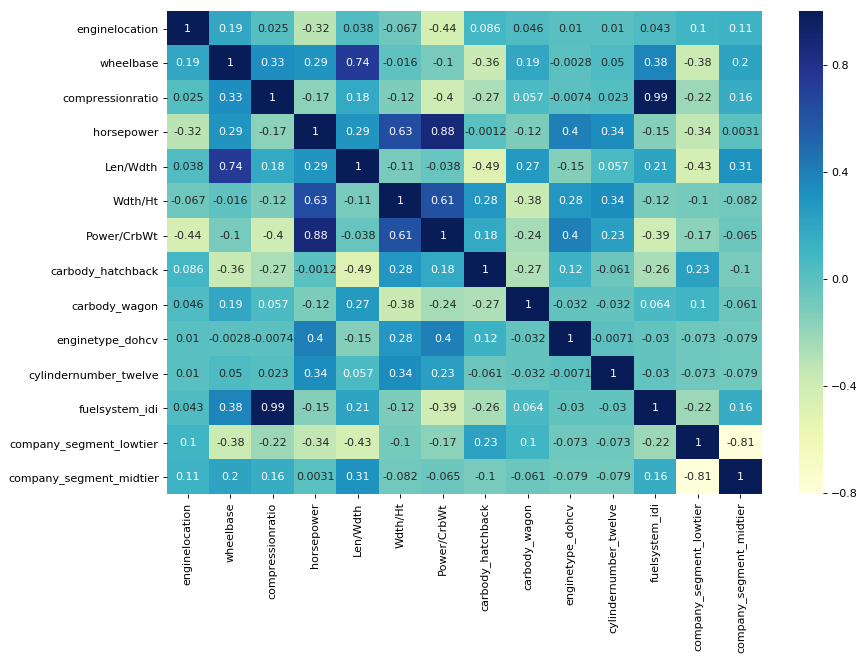

In [58]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_new.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)

plt.show()


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [59]:
X_train_new = X_train_new.drop('carbody_wagon', axis=1)
X_train_new.head()

,enginelocation,wheelbase,compressionratio,horsepower,Len/Wdth,Wdth/Ht,Power/CrbWt,carbody_hatchback,enginetype_dohcv,cylindernumber_twelve,fuelsystem_idi,company_segment_lowtier,company_segment_midtier
1,1,0.068966,0.12500,0.262500,0.574393,0.592205,0.360040,0,0,0,0,0,1
165,1,0.272414,0.15000,0.266667,0.578350,0.350729,0.449708,0,0,0,0,1,0
197,1,0.610345,0.15625,0.275000,0.847483,0.230896,0.267268,0,0,0,0,0,1
169,1,0.406897,0.14375,0.283333,0.655931,0.462513,0.389125,1,0,0,0,1,0
190,1,0.272414,0.09375,0.175000,0.505674,0.421594,0.313697,1,0,0,0,0,1


In [60]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const                      0.641167
enginelocation            -0.246688
wheelbase                  0.170933
compressionratio           0.278337
horsepower                 1.572933
Len/Wdth                  -0.197796
Wdth/Ht                    0.170559
Power/CrbWt               -0.990124
carbody_hatchback         -0.037885
enginetype_dohcv          -0.333655
cylindernumber_twelve     -0.325640
fuelsystem_idi            -0.257395
company_segment_lowtier   -0.302724
company_segment_midtier   -0.242766
dtype: float64

In [61]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     188.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.73e-76
Time:                        15:02:37   Log-Likelihood:                 220.32
No. Observations:                 141   AIC:                            -412.6
Df Residuals:                     127   BIC:                            -371.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,compressionratio,80.92
6,Power/CrbWt,63.55
3,horsepower,63.28
10,fuelsystem_idi,59.13
0,enginelocation,58.29
4,Len/Wdth,36.12
1,wheelbase,21.14
5,Wdth/Ht,15.90
11,company_segment_lowtier,10.03
12,company_segment_midtier,9.27


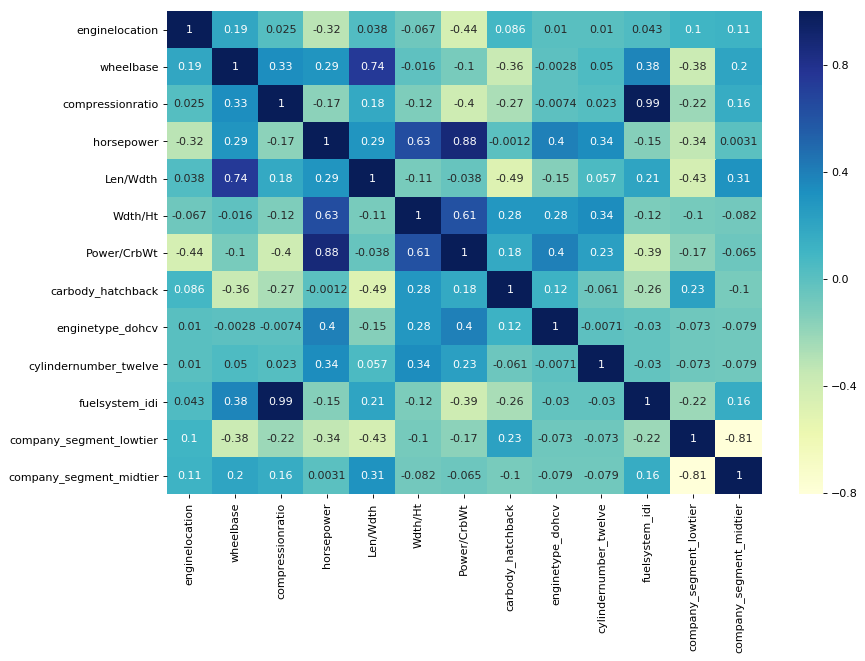

In [63]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_new.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)

plt.show()

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [64]:
X_train_new = X_train_new.drop('compressionratio', axis=1)
X_train_new.head()

,enginelocation,wheelbase,horsepower,Len/Wdth,Wdth/Ht,Power/CrbWt,carbody_hatchback,enginetype_dohcv,cylindernumber_twelve,fuelsystem_idi,company_segment_lowtier,company_segment_midtier
1,1,0.068966,0.262500,0.574393,0.592205,0.360040,0,0,0,0,0,1
165,1,0.272414,0.266667,0.578350,0.350729,0.449708,0,0,0,0,1,0
197,1,0.610345,0.275000,0.847483,0.230896,0.267268,0,0,0,0,0,1
169,1,0.406897,0.283333,0.655931,0.462513,0.389125,1,0,0,0,1,0
190,1,0.272414,0.175000,0.505674,0.421594,0.313697,1,0,0,0,0,1


In [65]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const                      0.700628
enginelocation            -0.267365
wheelbase                  0.160535
horsepower                 1.501553
Len/Wdth                  -0.184030
Wdth/Ht                    0.176193
Power/CrbWt               -0.963224
carbody_hatchback         -0.040177
enginetype_dohcv          -0.277816
cylindernumber_twelve     -0.251280
fuelsystem_idi            -0.030560
company_segment_lowtier   -0.309027
company_segment_midtier   -0.245504
dtype: float64

In [66]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     198.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.69e-76
Time:                        15:02:38   Log-Likelihood:                 217.88
No. Observations:                 141   AIC:                            -409.8
Df Residuals:                     128   BIC:                            -371.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,55.73
5,Power/CrbWt,52.77
2,horsepower,52.13
3,Len/Wdth,32.87
1,wheelbase,21.00
4,Wdth/Ht,15.80
10,company_segment_lowtier,9.88
11,company_segment_midtier,9.18
6,carbody_hatchback,2.39
9,fuelsystem_idi,1.65


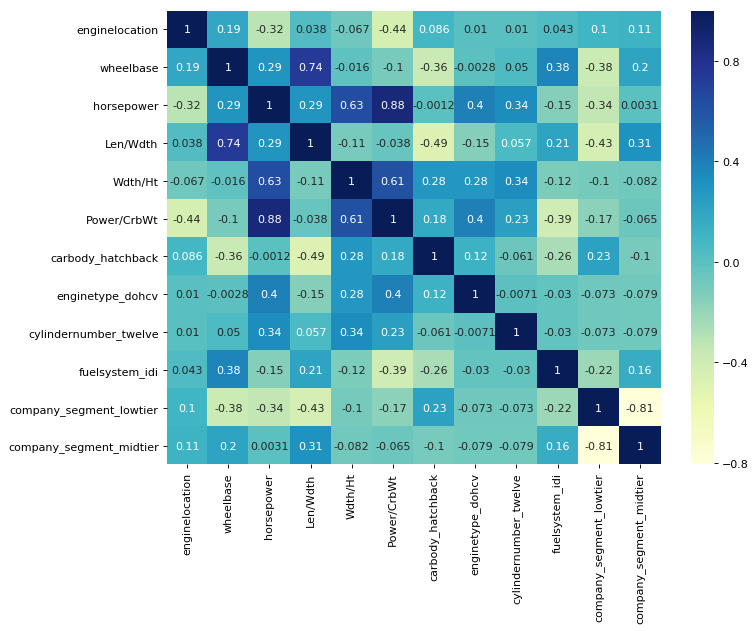

In [68]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_new.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [69]:
X_train_new = X_train_new.drop('fuelsystem_idi', axis=1)
X_train_new.head()

,enginelocation,wheelbase,horsepower,Len/Wdth,Wdth/Ht,Power/CrbWt,carbody_hatchback,enginetype_dohcv,cylindernumber_twelve,company_segment_lowtier,company_segment_midtier
1,1,0.068966,0.262500,0.574393,0.592205,0.360040,0,0,0,0,1
165,1,0.272414,0.266667,0.578350,0.350729,0.449708,0,0,0,1,0
197,1,0.610345,0.275000,0.847483,0.230896,0.267268,0,0,0,0,1
169,1,0.406897,0.283333,0.655931,0.462513,0.389125,1,0,0,1,0
190,1,0.272414,0.175000,0.505674,0.421594,0.313697,1,0,0,0,1


In [70]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const                      0.657103
enginelocation            -0.242357
wheelbase                  0.149795
horsepower                 1.456577
Len/Wdth                  -0.169107
Wdth/Ht                    0.166307
Power/CrbWt               -0.878584
carbody_hatchback         -0.038235
enginetype_dohcv          -0.291634
cylindernumber_twelve     -0.247371
company_segment_lowtier   -0.308410
company_segment_midtier   -0.248069
dtype: float64

In [71]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.96e-77
Time:                        15:02:40   Log-Likelihood:                 216.49
No. Observations:                 141   AIC:                            -409.0
Df Residuals:                     129   BIC:                            -373.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,55.60
2,horsepower,52.04
5,Power/CrbWt,50.46
3,Len/Wdth,32.82
1,wheelbase,20.28
4,Wdth/Ht,15.29
9,company_segment_lowtier,9.87
10,company_segment_midtier,9.16
6,carbody_hatchback,2.36
7,enginetype_dohcv,1.50


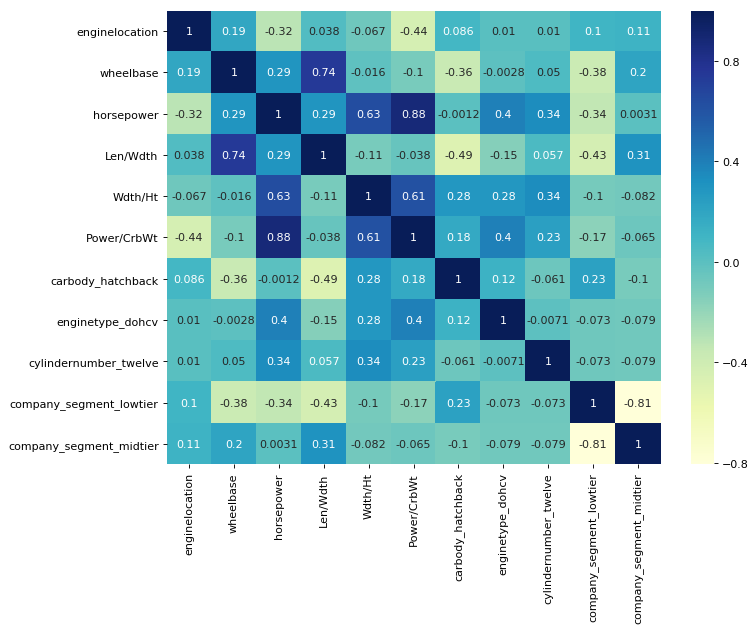

In [73]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_new.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [74]:
X_train_new = X_train_new.drop('enginelocation', axis=1)
X_train_new.head()

,wheelbase,horsepower,Len/Wdth,Wdth/Ht,Power/CrbWt,carbody_hatchback,enginetype_dohcv,cylindernumber_twelve,company_segment_lowtier,company_segment_midtier
1,0.068966,0.262500,0.574393,0.592205,0.360040,0,0,0,0,1
165,0.272414,0.266667,0.578350,0.350729,0.449708,0,0,0,1,0
197,0.610345,0.275000,0.847483,0.230896,0.267268,0,0,0,0,1
169,0.406897,0.283333,0.655931,0.462513,0.389125,1,0,0,1,0
190,0.272414,0.175000,0.505674,0.421594,0.313697,1,0,0,0,1


In [75]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.params

const                      0.450829
wheelbase                  0.108144
horsepower                 1.457535
Len/Wdth                  -0.168580
Wdth/Ht                    0.122419
Power/CrbWt               -0.768928
carbody_hatchback         -0.045992
enginetype_dohcv          -0.374835
cylindernumber_twelve     -0.296192
company_segment_lowtier   -0.342076
company_segment_midtier   -0.279680
dtype: float64

In [76]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.13e-74
Time:                        15:02:41   Log-Likelihood:                 205.18
No. Observations:                 141   AIC:                            -388.4
Df Residuals:                     130   BIC:                            -355.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Power/CrbWt,42.98
1,horsepower,40.72
2,Len/Wdth,27.30
0,wheelbase,16.62
3,Wdth/Ht,12.15
8,company_segment_lowtier,7.69
9,company_segment_midtier,7.62
5,carbody_hatchback,2.31
6,enginetype_dohcv,1.37
7,cylindernumber_twelve,1.34


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [78]:
X_train_new = X_train_new.drop('Power/CrbWt', axis=1)
X_train_new.head()

,wheelbase,horsepower,Len/Wdth,Wdth/Ht,carbody_hatchback,enginetype_dohcv,cylindernumber_twelve,company_segment_lowtier,company_segment_midtier
1,0.068966,0.262500,0.574393,0.592205,0,0,0,0,1
165,0.272414,0.266667,0.578350,0.350729,0,0,0,1,0
197,0.610345,0.275000,0.847483,0.230896,0,0,0,0,1
169,0.406897,0.283333,0.655931,0.462513,1,0,0,1,0
190,0.272414,0.175000,0.505674,0.421594,1,0,0,0,1


In [79]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.params

const                      0.284658
wheelbase                  0.287602
horsepower                 0.668265
Len/Wdth                  -0.087475
Wdth/Ht                    0.169888
carbody_hatchback         -0.047338
enginetype_dohcv          -0.323132
cylindernumber_twelve     -0.169494
company_segment_lowtier   -0.370486
company_segment_midtier   -0.306937
dtype: float64

In [80]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     169.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.23e-67
Time:                        15:02:42   Log-Likelihood:                 186.86
No. Observations:                 141   AIC:                            -353.7
Df Residuals:                     131   BIC:                            -324.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Len/Wdth,27.05
0,wheelbase,12.64
3,Wdth/Ht,11.87
1,horsepower,9.31
8,company_segment_midtier,5.67
7,company_segment_lowtier,5.01
4,carbody_hatchback,2.29
5,enginetype_dohcv,1.37
6,cylindernumber_twelve,1.25


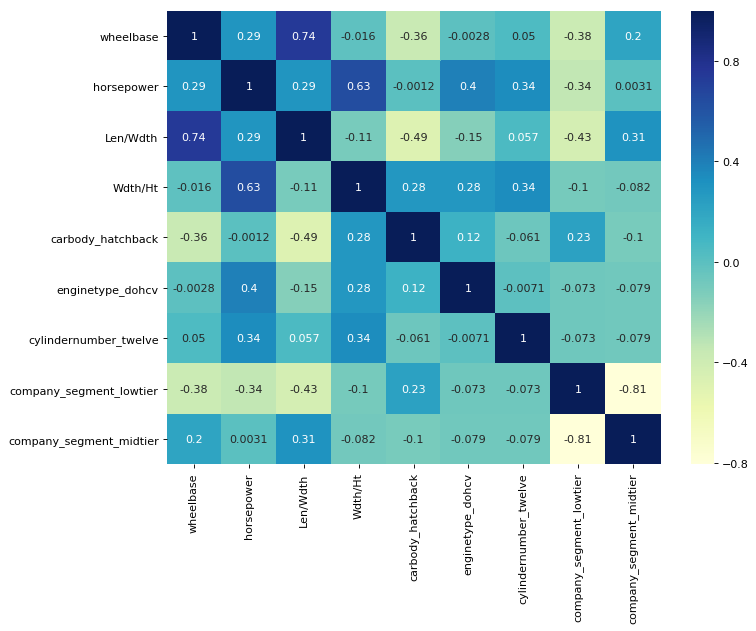

In [82]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_new.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [83]:
X_train_new = X_train_new.drop('Len/Wdth', axis=1)
X_train_new.head()

,wheelbase,horsepower,Wdth/Ht,carbody_hatchback,enginetype_dohcv,cylindernumber_twelve,company_segment_lowtier,company_segment_midtier
1,0.068966,0.262500,0.592205,0,0,0,0,1
165,0.272414,0.266667,0.350729,0,0,0,1,0
197,0.610345,0.275000,0.230896,0,0,0,0,1
169,0.406897,0.283333,0.462513,1,0,0,1,0
190,0.272414,0.175000,0.421594,1,0,0,0,1


In [84]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.params

const                      0.255862
wheelbase                  0.243306
horsepower                 0.632779
Wdth/Ht                    0.187946
carbody_hatchback         -0.039886
enginetype_dohcv          -0.286977
cylindernumber_twelve     -0.164946
company_segment_lowtier   -0.373880
company_segment_midtier   -0.314263
dtype: float64

In [85]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     187.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.04e-68
Time:                        15:02:43   Log-Likelihood:                 185.50
No. Observations:                 141   AIC:                            -353.0
Df Residuals:                     132   BIC:                            -326.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Wdth/Ht,11.87
1,horsepower,7.78
0,wheelbase,5.61
7,company_segment_midtier,3.62
6,company_segment_lowtier,3.35
3,carbody_hatchback,2.08
4,enginetype_dohcv,1.28
5,cylindernumber_twelve,1.24


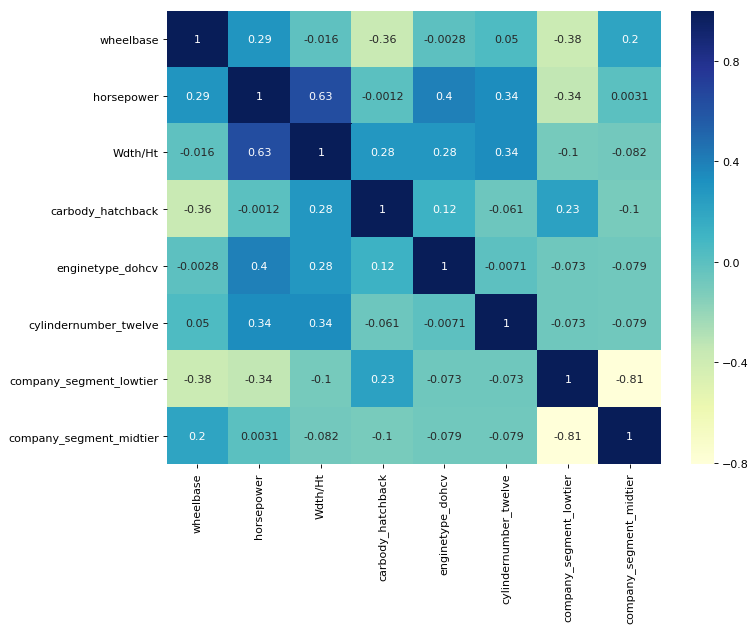

In [87]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_new.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [88]:
X_train_new = X_train_new.drop('cylindernumber_twelve', axis=1)
X_train_new.head()

,wheelbase,horsepower,Wdth/Ht,carbody_hatchback,enginetype_dohcv,company_segment_lowtier,company_segment_midtier
1,0.068966,0.262500,0.592205,0,0,0,1
165,0.272414,0.266667,0.350729,0,0,1,0
197,0.610345,0.275000,0.230896,0,0,0,1
169,0.406897,0.283333,0.462513,1,0,1,0
190,0.272414,0.175000,0.421594,1,0,0,1


In [89]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

lr_9.params

const                      0.260899
wheelbase                  0.248213
horsepower                 0.612661
Wdth/Ht                    0.165485
carbody_hatchback         -0.036124
enginetype_dohcv          -0.257733
company_segment_lowtier   -0.371047
company_segment_midtier   -0.309982
dtype: float64

In [90]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     208.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.17e-68
Time:                        15:02:44   Log-Likelihood:                 182.96
No. Observations:                 141   AIC:                            -349.9
Df Residuals:                     133   BIC:                            -326.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Wdth/Ht,11.47
1,horsepower,7.61
0,wheelbase,5.53
6,company_segment_midtier,3.48
5,company_segment_lowtier,3.26
3,carbody_hatchback,2.05
4,enginetype_dohcv,1.24


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [92]:
X_train_new = X_train_new.drop('Wdth/Ht', axis=1)
X_train_new.head()

,wheelbase,horsepower,carbody_hatchback,enginetype_dohcv,company_segment_lowtier,company_segment_midtier
1,0.068966,0.262500,0,0,0,1
165,0.272414,0.266667,0,0,1,0
197,0.610345,0.275000,0,0,0,1
169,0.406897,0.283333,1,0,1,0
190,0.272414,0.175000,1,0,0,1


In [93]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

lr_10.params

const                      0.301289
wheelbase                  0.232080
horsepower                 0.719233
carbody_hatchback         -0.023324
enginetype_dohcv          -0.264147
company_segment_lowtier   -0.371115
company_segment_midtier   -0.311877
dtype: float64

In [94]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.80e-67
Time:                        15:02:45   Log-Likelihood:                 177.78
No. Observations:                 141   AIC:                            -341.6
Df Residuals:                     134   BIC:                            -320.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,5.51
1,horsepower,3.69
5,company_segment_midtier,2.95
4,company_segment_lowtier,2.44
2,carbody_hatchback,1.88
3,enginetype_dohcv,1.24


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [96]:
X_train_new = X_train_new.drop('carbody_hatchback', axis=1)
X_train_new.head()

,wheelbase,horsepower,enginetype_dohcv,company_segment_lowtier,company_segment_midtier
1,0.068966,0.262500,0,0,1
165,0.272414,0.266667,0,1,0
197,0.610345,0.275000,0,0,1
169,0.406897,0.283333,0,1,0
190,0.272414,0.175000,0,0,1


In [97]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

lr_11.params

const                      0.297255
wheelbase                  0.249868
horsepower                 0.704996
enginetype_dohcv          -0.276439
company_segment_lowtier   -0.381440
company_segment_midtier   -0.319417
dtype: float64

In [98]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     266.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.14e-68
Time:                        15:02:45   Log-Likelihood:                 176.32
No. Observations:                 141   AIC:                            -340.6
Df Residuals:                     135   BIC:                            -323.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,4.99
1,horsepower,3.45
4,company_segment_midtier,2.48
3,company_segment_lowtier,1.69
2,enginetype_dohcv,1.23


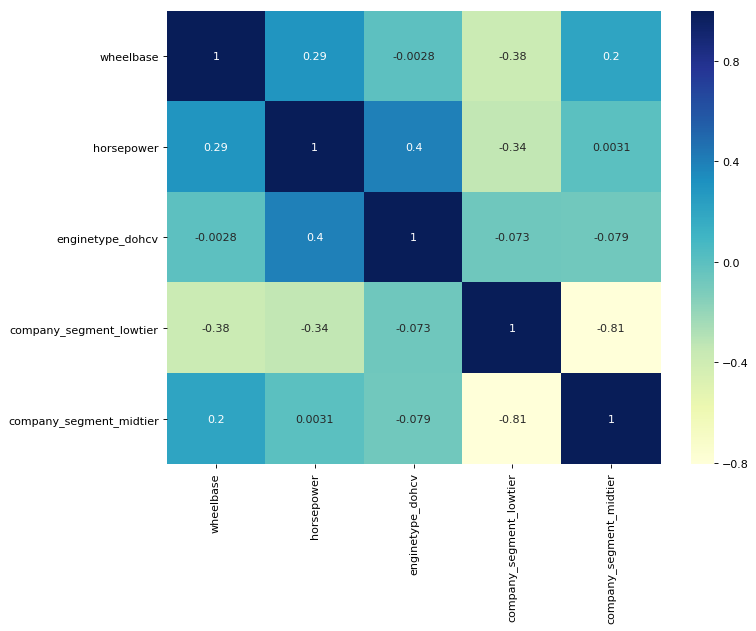

In [100]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_new.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Model# 11 is a fairly good model based on train data. It has the following properties:

 - R-squared:     0.908
 - Adj. R-squared:                  0.905
 - p value(for all features):		 0.000
 - AIC:                             340.6
 - BIC:                             323.0
 - highest VIF						 4.99
 
#### Values of beta coefficients: 

 - const:                       0.2973
 - wheelbase:                   0.2499
 - horsepower:                  0.7050
 - enginetype_dohcv:           -0.2764
 - company_segment_lowtier:    -0.3814
 - company_segment_midtier:    -0.3194
 
 ##### We will do residual analysis to validate further

## Step 9: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [101]:
y_train_price = lr_11.predict(X_train_lm)

Text(0.5,0,'Errors')

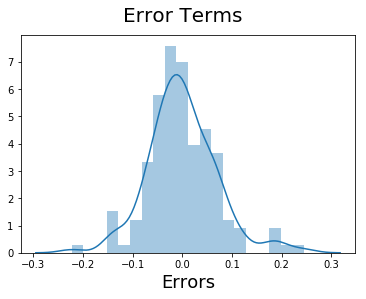

In [102]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### The above plots show that the error terms are normally distributed with mean value at 0.

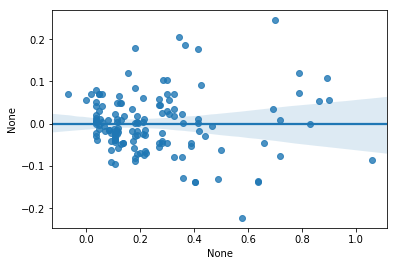

In [103]:
fig = plt.figure()
sns.regplot(y_train_price, (y_train-y_train_price))
plt.show()

#### The above plots show that the error terms have a constant variance.

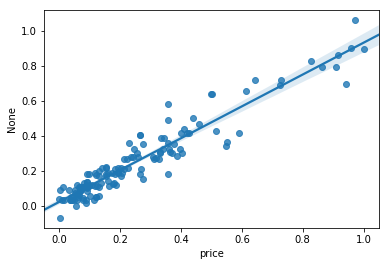

In [104]:
sns.regplot(y_train, y_train_price)
plt.show()

#### The line that has been plotted based on beta coefficients represent the data points pretty well

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. eleventh model.

#### Applying the scaling on the test sets

In [105]:
# Selecting similar columns from test set for scaling
# Earlier we had used 'fit_transform' on the train set but now just 'transform' on the test set.
num_vars = ['wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price','Len/Wdth','Wdth/Ht','Power/CrbWt','Hmpg/Cmpg']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
143,1,1,0,1,0.365517,0.330489,0.177358,0.771429,0.271429,0.12500,...,0,0,0,0,0,1,0,0,1,0
104,1,1,1,1,0.162069,0.614042,0.452830,0.635714,0.571429,0.12500,...,0,0,0,0,0,1,0,0,0,1
32,1,1,1,1,0.244828,0.135376,0.067925,0.264286,0.476190,0.19375,...,0,0,0,0,0,0,0,0,1,0
91,1,1,1,1,0.272414,0.166796,0.135849,0.435714,0.580952,0.15000,...,0,1,0,0,0,0,0,0,0,1
186,1,1,0,1,0.368966,0.305275,0.181132,0.464286,0.633333,0.12500,...,0,0,0,0,0,1,0,0,0,1


In [106]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.0,61.000000,61.0,61.000000,61.000000,61.000000,61.000000,61.0,61.000000,61.000000
mean,0.934426,0.868852,0.426230,0.983607,0.409893,0.398320,0.239530,0.559251,0.591803,0.170697,...,0.0,0.311475,0.0,0.065574,0.016393,0.508197,0.049180,0.0,0.573770,0.327869
std,0.249590,0.340363,0.498632,0.128037,0.201226,0.192157,0.130069,0.190315,0.147778,0.213526,...,0.0,0.466940,0.0,0.249590,0.128037,0.504082,0.218039,0.0,0.498632,0.473333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.087277,0.067925,0.264286,0.057143,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.264158,0.139623,0.435714,0.514286,0.100000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.354926,0.222642,0.521429,0.580952,0.125000,...,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.544828,0.557797,0.301887,0.742857,0.661905,0.150000,...,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.743396,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


#### Dividing into X_test and y_test

In [107]:
y_test = df_test.pop('price')
X_test = df_test

In [108]:
# Dicing the X_test dataframe with only the columns that were cosen by our model
X_test = X_test[['wheelbase','horsepower','company_segment_midtier','company_segment_lowtier','enginetype_dohcv']]
X_test.head()

,wheelbase,horsepower,company_segment_midtier,company_segment_lowtier,enginetype_dohcv
143,0.365517,0.191667,0,1,0
104,0.162069,0.466667,1,0,0
32,0.244828,0.050000,0,1,0
91,0.272414,0.087500,1,0,0
186,0.368966,0.154167,1,0,0


In [109]:
X_test.shape

(61, 5)

In [110]:
# Adding constant variable to test dataframe
X_test_m11 = sm.add_constant(X_test)

In [111]:
# Adding the constant to the dataframe
X_test_m11.head()

,const,wheelbase,horsepower,company_segment_midtier,company_segment_lowtier,enginetype_dohcv
143,1.0,0.365517,0.191667,0,1,0
104,1.0,0.162069,0.466667,1,0,0
32,1.0,0.244828,0.050000,0,1,0
91,1.0,0.272414,0.087500,1,0,0
186,1.0,0.368966,0.154167,1,0,0


In [112]:
# Making predictions using the eleventh model

y_pred_m11 = lr_11.predict(X_test_m11)

## Step 9: Model Evaluation

#### Plotting the actual and predicted price values from the test dataset so check the likeness

Text(0,0.5,'Views')

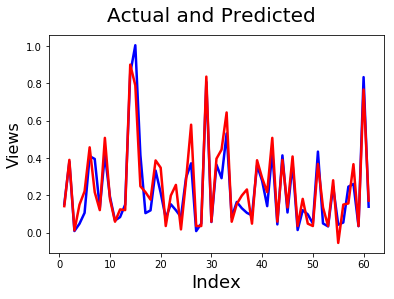

In [113]:
#Actual vs Predicted
c = [i for i in range(1,62,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m11, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

#### Drawing a scatter plot with actual and predicted price values from the test dataset to check the spread

Text(0,0.5,'y_pred')

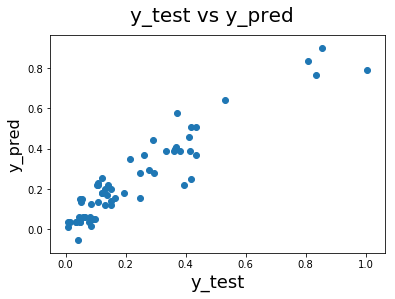

In [114]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m11)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Drawing a scatter plot of the error terms to check the spread to ensure that the error terms have constant variance (homoscedasticity). The variance doesn't increase (or decrease) or follow a pattern as the error values change.

Text(0,0.5,'ytest-ypred')

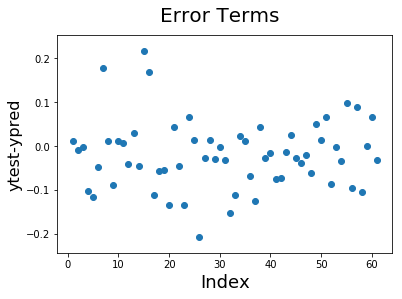

In [115]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,62,1)]
plt.scatter(c,y_test-y_pred_m11)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

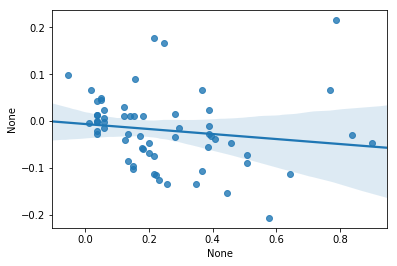

In [116]:
fig = plt.figure()
sns.regplot(y_pred_m11, (y_test - y_pred_m11))
plt.show()

#### Plotting the distribution of the error terms

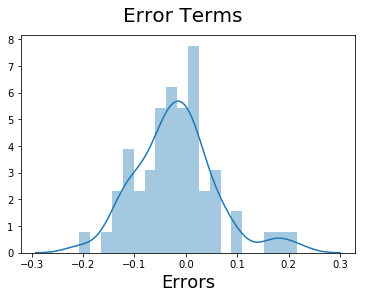

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test-y_pred_m11), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### Plotting a line for the scatter plot including actual and predicted prices from test dataset. Overall we have a pretty linear spread

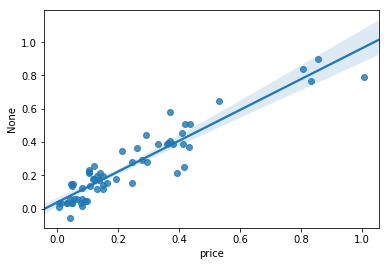

In [118]:
sns.regplot(y_test, y_pred_m11)
plt.show()

#### Testing the r2 score and adjusted r2 score of the model on the test dataset

In [119]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m11)

0.8664250432668826

In [120]:
# Adjusted R^2 = 1−((1−R2)(N−1)/(N−p−1))
# Here, n,N is the sample size meaning the number of rows you'd have in the dataset and p is the number of predictor variables.
r2_test = r2_score(y_test, y_pred_m11)
Adj_r2_test = 1-.134*60/55
Adj_r2_test


0.8538181818181818

## Step 10: Inference

##### Model# 11 is a fairly good model. It has the following properties:
 
| Properties | Values   |
|------|------|
|R-squared  | 0.909|
|Adj. R-squared | 0.905|
|p - value | 0.000|
|AIC | 340.6|
|BIC | 323.0|
|highest VIF | 4.99|
|r2_score | 0.866|

#### From the properties, we can arrive at the following conclusion:

 - <font color = blue>The R-squared value on the trained data is very close to the Adj. R-Squared value which indicates that none of the parameters in model are redundant. </font>
 - <font color = blue>We have a significantly high r2_score on the test dataset.</font>
 - <font color = blue>With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.</font>
 
#### From residual analysis on the test dataset, we have the following observations:
 
 - <font color = blue>Error terms are normally distributed with mean zero</font>
 - <font color = blue>Error terms have constant variance (homoscedasticity) and does not follow any pattern, as there is no curve, and shows no relation which indicates that it is just the white noise.</font>
 - <font color = blue>Moreover the feature variables and the dependent variable follow a linear relationship and the fitted line represents the dataset almost perfectly.</font>
 
#### Coefficients, P values and Vifs of featured variables: 


 
| Features | coefficients | p-value|Vif value|
|------|------|------|------|
|const  | 0.2973|0.000|-|
|wheelbase | 0.2499|0.000| 4.99|
|horsepower | 0.7050|0.000| 3.45|
|enginetype_dohcv | -0.2764| 0.001|2.48|
|company_segment_lowtier | -0.3814| 0.000| 1.69|
|company_segment_midtier| -0.3194| 0.000|1.23|



 ##### Thus we can see that the model seems to be stable. We can see that the equation of our best fitted line is:
 											
<font color = red>price =  0.2973 + 0.2499×wheelbase + 0.7050×horsepower - 0.2764xenginetype_dohcv - 0.3814×company_segment_lowtier - 0.3194×company_segment_midtier</font>

This equation implies how the price of the vehical changes with a unit change in any of these independent variable with all other variables held constant.

#### Comparison with other models
Two other models were built, one with 7 predictor features(Model 1) and another with the same 5 preditors as the current model but without any outlier treatment(Model 2). All three models were able to predict the car price closely.

A comparative study of properties for all the 3 models are given below:

| Properties | Current Model|Model 1|Model 2|
|------|------|------|------|
|`R-squared`  |0.908|0.893 |<font color = red>0.909</font>|
|`Adj. R-squared` | <font color = red>0.905</font>|0.888|<font color = red>0.905</font>|
|`test_r2_score` |0.866|0.715|<font color = red>0.876</font>|
|`test_Adj_r2_score` | 0.8538|0.677|<font color = red>0.865</font>|
|`highest p - value` |<font color = red> 0.001</font>|0.008|<font color = red>0.001</font>|
|`AIC` |-340.6|-315.8|<font color = red>-364.1</font>|
|`BIC` |-323.0|-292.2|<font color = red>-346.4</font>|
|`highest VIF` |4.99|<font color = red>4.88</font>|5.01|


##### <font color = red>*preferred observations are marked in red across the models</font>

The overall model fit for the Model 1 was good. The best fit line represented the dataset fairly well. However the error terms in the test dataset didnt have mean value of 0. Also, r2_score on the test dataset was considerably lesser than other models. This was mostly a case of overfit. So this model was eliminated from consideraion.

Model 2 had the most preferred statistics for most of the parameters. However the Vif value was a little bit on the higher side for one the parameters. Also, because no outlier treatment was done on the dataset, the error distribution was a little bit skewed on the two ends. 

The current model on the other hand was modelrately good on all fronts with a satisfactory high test r2_score.

`Therefore, considering this, we chose this model.`



#### From the model we learn that the variables that can affect Car Price are:

`1 wheelbase` - <font color = blue>the price of the car changes by 0.2499 for every unit change in the wheelbase dimension if all other variables are held constant. </font>

`2 horsepower` - <font color = blue>the price of car increases by a factor of 0.7050 for every unit increase in horsepower.  </font>

`3 enginetype_dohcv` - <font color = blue> since having a dohcv type of engine is attributed with relatively low price cars the coeffeciant for this variable is negative. </font>

`4 company_segment_lowtier` - <font color = blue>The company name is also essensial in determining the price the automobile. Low tier companies names like, Chevrolet, Toyota, Honda and Renault further reduces the price by a factor of 0.3814. </font>

`5 company_segment_midtier` - <font color = blue>mid tier companies names like, volkswagen, nissan, volvo and mazda also reduces the price by a factor of 0.3194. </font>